In [62]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
price_df = pd.read_pickle("data/asset_cc2.pkl")

In [81]:
idx = ['snp', 't10', 'brent', 'dxy', 'gold', 'silver']
label_map = {
    'brent':  'Brent',
    'dxy':    'DXY',
    'gold':   'Gold',
    'silver': 'Silver',
    'snp':    'S&P 500',
    't10':    'US10Y'
}

In [84]:
price_df = price_df.loc[:,idx].rename(label_map, axis=1)

In [85]:
returns = price_df.pct_change().dropna()

# 2) Descriptive stats
stats = returns.describe().T[['mean', 'std', 'min', 'max']].rename(
    {
        "mean":"Mean",
        "std":"Std",
        "min":"Min",
        "max":"Max"    
    },axis=1)
stats["Mean"] = stats["Mean"] * 252
stats["Std"] = stats["Std"] * np.sqrt(252)
stats['Skew'] = returns.skew()
stats['Kurtosis'] = returns.kurtosis()

# 3) Performance metrics
cum_ret = (1 + returns).cumprod().iloc[-1] - 1
hwm = (1 + returns).cumprod().cummax()
drawdown = (1 + returns).cumprod() / hwm - 1
mdd = drawdown.min()
sharpe = returns.mean() / returns.std() * np.sqrt(252)

perf = pd.DataFrame({
    'Cum': cum_ret,
    'MDD': mdd,
    'Sharpe': sharpe
})

# 4) Combine
summary = stats.join(perf)

# 5) Percentage formatting without rounding
pct_cols = ['Mean', 'Std', 'Min', 'Max', 'Cum', 'MDD']
summary[pct_cols] = summary[pct_cols] * 100

In [86]:
print(summary.round(2).to_latex(float_format="%.2f"))

\begin{tabular}{lrrrrrrrrr}
\toprule
 & Mean & Std & Min & Max & Skew & Kurtosis & Cum & MDD & Sharpe \\
\midrule
S&P 500 & 9.70 & 18.23 & -11.98 & 10.99 & -0.16 & 10.37 & 1544.96 & -56.78 & 0.53 \\
US10Y & 1.34 & 8.90 & -3.15 & 5.09 & -0.02 & 2.31 & 38.91 & -35.22 & 0.15 \\
Brent & 17.25 & 54.97 & -64.33 & 123.36 & 7.77 & 291.66 & 204.39 & -93.76 & 0.31 \\
DXY & 0.52 & 8.07 & -3.02 & 2.89 & -0.02 & 2.05 & 6.99 & -41.00 & 0.06 \\
Gold & 7.26 & 15.98 & -8.50 & 10.95 & -0.04 & 7.96 & 705.02 & -44.58 & 0.45 \\
Silver & 9.28 & 28.35 & -15.90 & 14.94 & -0.47 & 6.90 & 521.17 & -74.99 & 0.33 \\
\bottomrule
\end{tabular}



In [123]:
returns

,S&P 500,US10Y,Brent,DXY,Gold,Silver
1990-01-03,-0.002502,-0.004620,0.068396,0.001379,-0.014176,-0.006282
1990-01-04,-0.008640,0.000926,-0.006623,-0.020123,0.011100,0.022031
1990-01-05,-0.009840,-0.000926,0.028000,0.003567,0.019212,0.009372
1990-01-08,0.004543,-0.002774,-0.075659,-0.008616,-0.008568,-0.013928
1990-01-09,-0.011871,0.000000,-0.016370,0.003259,0.002963,-0.002260
...,...,...,...,...,...,...
2025-05-09,-0.000712,0.000000,0.032787,-0.002981,0.002388,0.008695
2025-05-12,0.032559,-0.007633,0.010893,0.014451,-0.026328,-0.004463
2025-05-13,0.007248,-0.003822,0.025708,-0.007761,0.005181,0.011607
2025-05-14,0.001024,-0.003820,-0.010806,0.000396,-0.020771,-0.022219


In [ ]:
corr_matrix = returns.corr()

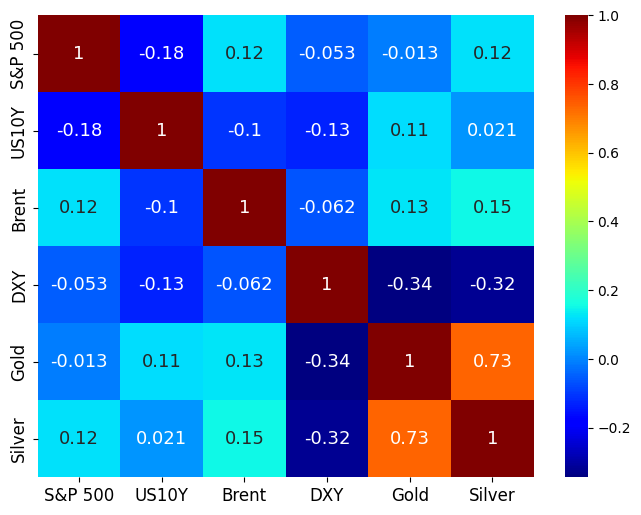

In [88]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, cmap='jet', annot=True, annot_kws={"size": 13},)
plt.xticks(fontsize=12)           # x축 tick 폰트 크기
plt.yticks(fontsize=12);

In [97]:
rolling_corr = returns.rolling(window=120).corr().dropna()
rolling_corr = rolling_corr.loc[rolling_corr.index.get_level_values(1) == "S&P 500"].drop("S&P 500", axis=1)
rolling_corr.index = rolling_corr.index.get_level_values(0)

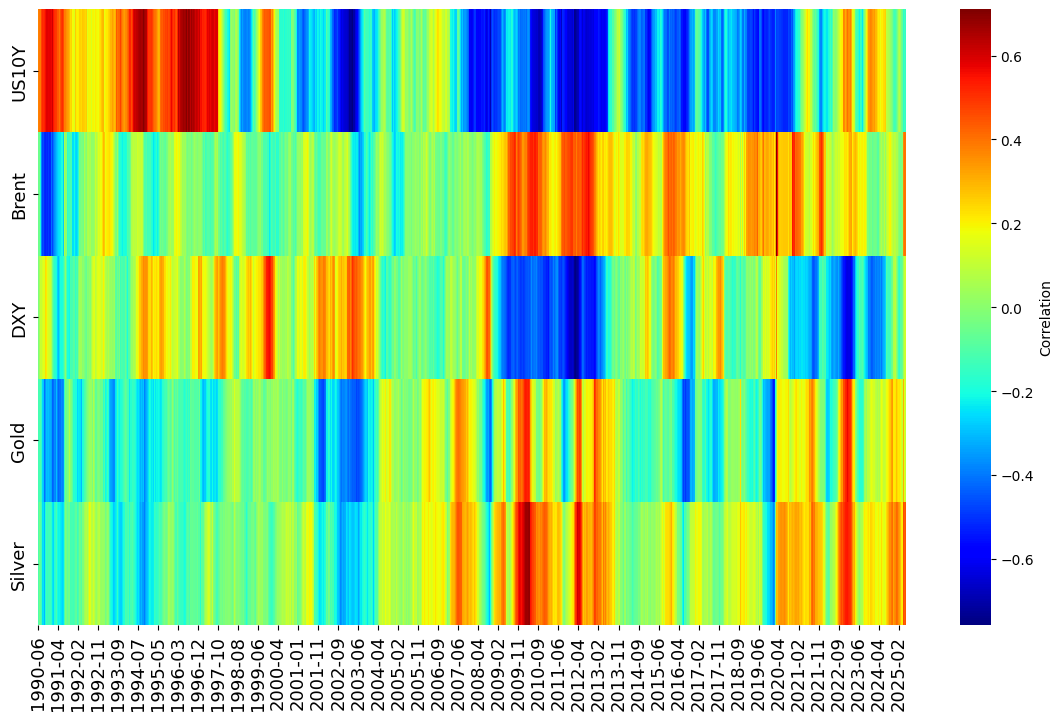

In [ ]:
# 주식과 나머지 페어의 상관관계
x_step = 200
x_labels = rolling_corr.index

plt.figure(figsize=(14,8))
sns.heatmap(
    rolling_corr.T,
    cmap='jet',
    cbar_kws={'label': 'Correlation'}
)

xticks_pos = np.arange(0, len(x_labels), x_step)
plt.xticks(
    xticks_pos,
    x_labels[::x_step].strftime('%Y-%m'),
    rotation=90,
    fontsize=13
)
plt.yticks(fontsize=13)
plt.ylabel(None);